Begining

In [1004]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [1005]:
print(os.listdir('/Users/ellis/OneDrive - University of Warwick/Dissertation/Actual Work/implementation/'))

['notebooka82d36920b.ipynb', 'kddcup.testdata.unlabeled', '.DS_Store', 'kddcup.testdata.unlabeled_10_percent', 'kddcup.names', 'training_attack_types', '.gitignore', '.gitattributes', 'dissert.ipynb', 'kddcup.data_10_percent_corrected', '.ipynb_checkpoints', 'kddcup.newtestdata_10_percent_unlabeled', '.git', 'kddcup.data.corrected', 'corrected', 'Dissertation-1.ipynb']


In [1006]:
with open("/Users/ellis/OneDrive - University of Warwick/Dissertation/Actual Work/implementation/kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

Add columns since there are none

In [1007]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [1008]:
with open("/Users/ellis/OneDrive - University of Warwick/Dissertation/Actual Work/implementation/training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




add attack types

In [1009]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

Now read the dataset

In [1010]:
path = "/Users/ellis/OneDrive - University of Warwick/Dissertation/Actual Work/implementation/kddcup.data_10_percent_corrected"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack_Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack_Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [1011]:
df.shape

(494021, 43)

Find the number of hits on per attack type

In [1012]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

Find the number of hits on per main attack types

In [1013]:
df['Attack_Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack_Type, dtype: int64

In [1014]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

Begin DataPreprocessing

Check if there are null values

In [1015]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [1016]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack_Type')

cate_cols

['service', 'protocol_type', 'flag']

Categorical features distribution

In [1017]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

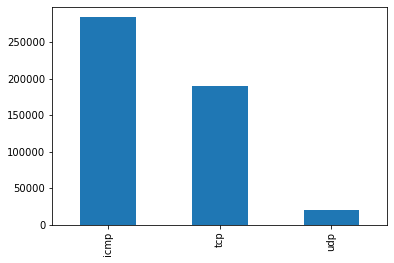

In [1018]:
bar_graph('protocol_type')

Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

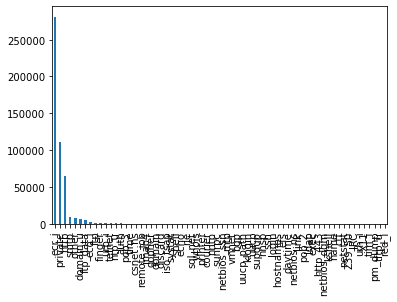

In [1019]:
bar_graph('service')

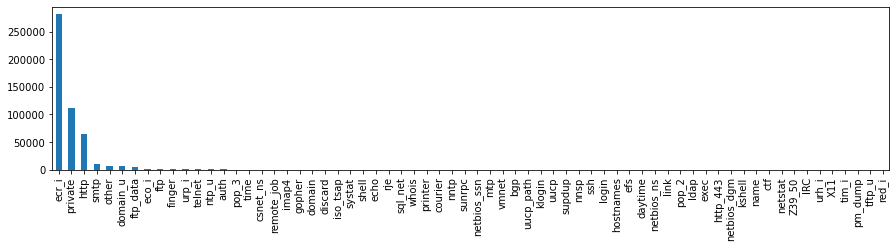

In [1020]:
plt.figure(figsize=(15,3))
bar_graph('service')

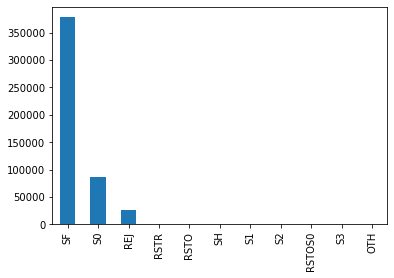

In [1021]:
bar_graph('flag')

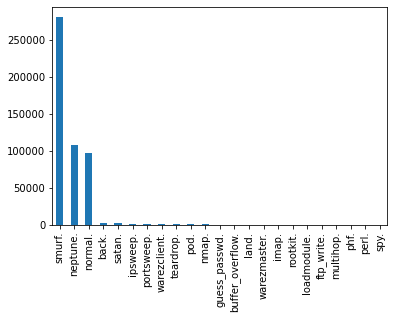

In [1022]:
bar_graph('target')

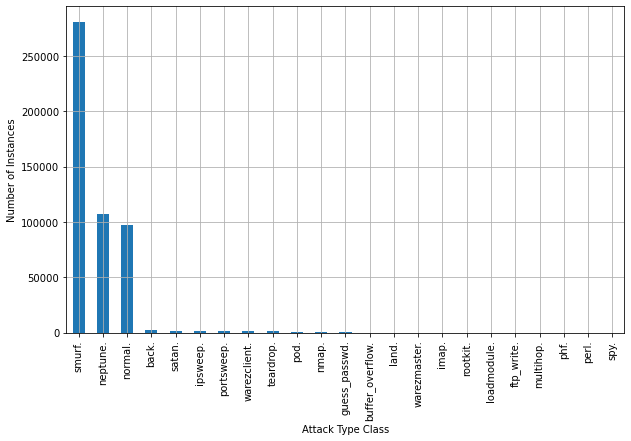

In [1023]:
plt.figure(figsize=(10,6))
class_distribution = df['target'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Attack Type Class')
plt.ylabel('Number of Instances')
plt.grid()
plt.show()

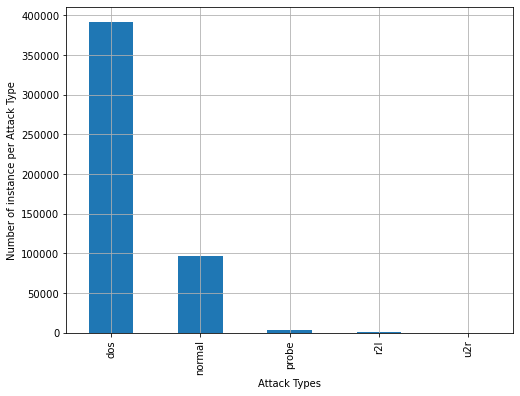

In [1024]:
plt.figure(figsize=(8,6))
bar_graph('Attack_Type')
plt.xlabel('Attack Types')
plt.ylabel('Number of instance per Attack Type')
plt.grid()
plt.show()

In [1025]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack_Type'],
      dtype='object')

In [1026]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack_Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [1027]:
df.shape

(494021, 43)

Data Correlation

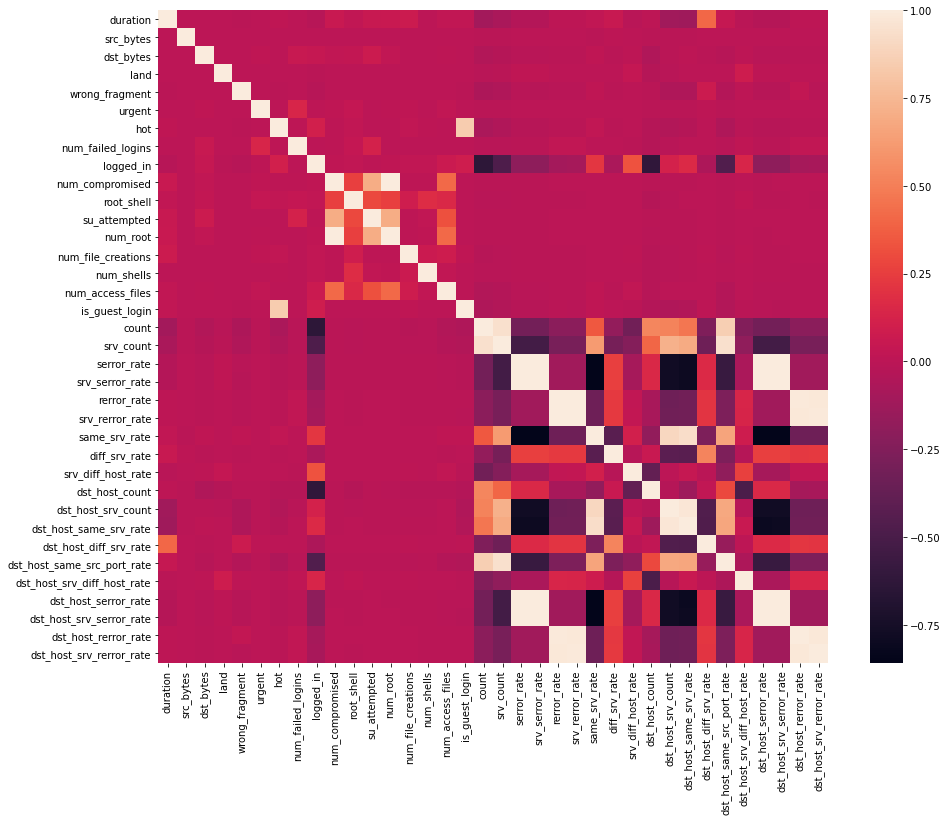

In [1028]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [1029]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [1030]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack_Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [1031]:
df.shape

(494021, 33)

For standard deviation

In [1032]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

FEATURE MAPPING - shows the number of hits per column. Mainly to also convert the values to numerical

In [1033]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [1034]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [1035]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [1036]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [1037]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack_Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [1038]:
df.drop('service',axis = 1,inplace= True)

In [1039]:
df.shape

(494021, 32)

In [1040]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack_Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [1041]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

In [1042]:
attack_vs_protocol = pd.crosstab(df.target ,df.protocol_type)
attack_vs_protocol

protocol_type,0,1,2
target,,,
back.,0,2203,0
buffer_overflow.,0,30,0
ftp_write.,0,8,0
guess_passwd.,0,53,0
imap.,0,12,0
ipsweep.,1153,94,0
land.,0,21,0
loadmodule.,0,9,0
multihop.,0,7,0


Begin Test and Train (Modeling)

In [1043]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [1044]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack_Type']]
X = df.drop(['Attack_Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


In [1045]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack_Type
0,0,1,0,181,5450,0,0,0,0,0,...,0.0,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal
1,0,1,0,239,486,0,0,0,0,0,...,0.0,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal
2,0,1,0,235,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal
3,0,1,0,219,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal
4,0,1,0,217,2032,0,0,0,0,0,...,0.0,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal


In [1046]:
df.shape

(494021, 31)

GAUSSIAN NAIVE BAYES

In [1047]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()

In [1048]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [1049]:
print("Training time: ",end_time-start_time)

Training time:  0.45836687088012695


In [1050]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()

In [1051]:
print("Testing time: ",end_time-start_time)

Testing time:  0.20566415786743164


In [1052]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.8795114110829804
Test score is: 0.8790384414851528


In [1053]:
#Measure accuracy
from sklearn.metrics import confusion_matrix
print('Predicting on the test data:')

cm=confusion_matrix(Y_test,Y_test_pred1)
print(cm)

Predicting on the test data:
[[121276    620   7108      5     97]
 [  2878  20540   6117    313   2319]
 [    13      2   1329      1      3]
 [     0      3      4    148    232]
 [     0      0      2      3     14]]


Calculate for TP,TN,FP,

In [1054]:
import disarray
class_name = ("dos","r2l","probe","u2r","normal")

In [1055]:
df = pd.DataFrame(cm,index=class_name, columns=class_name)
print(df)

           dos    r2l  probe  u2r  normal
dos     121276    620   7108    5      97
r2l       2878  20540   6117  313    2319
probe       13      2   1329    1       3
u2r          0      3      4  148     232
normal       0      0      2    3      14


In [1056]:
df.da.TP

dos       121276
r2l        20540
probe       1329
u2r          148
normal        14
dtype: int64

detection rate/TP/recall/sensitivity

In [1057]:
df.da.micro_true_positive_rate

0.8790384414851528

In [1058]:
df.da.micro_recall

0.8790384414851528

In [1059]:
df.da.micro_sensitivity

0.8790384414851528

false alarm/FP

In [1060]:
df.da.micro_false_positive_rate

0.030240389628711808

Failed detections/FN

In [1061]:
df.da.micro_false_negative_rate

0.12096155851484723

Classification Accuracy

In [1062]:
df.da.micro_accuracy

0.9516153765940611

Present all rates

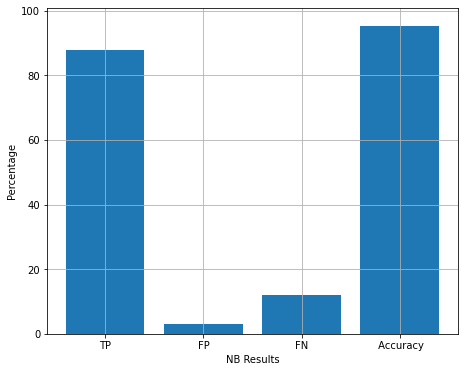

In [1063]:
names = ['TP','FP','FN',' Accuracy']
values = [87.903,3.024,12.096,95.161]
f = plt.figure(figsize=(25,6),num=10)
plt.subplot(131)
plt.ylim(0,101)
plt.xlabel('NB Results')
plt.bar(names,values)
plt.ylabel('Percentage')
plt.grid()
plt.show()

DECISION TREE

In [1064]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [1065]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  0.995919942855835


In [1066]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.0937650203704834


In [1067]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9905829108684749
Test score is: 0.9905230421954646


In [1068]:
#Measure accuracy
from sklearn.metrics import confusion_matrix
print('Predicting on the test data:')

cm=confusion_matrix(Y_test,Y_test_pred2)
print(cm)

Predicting on the test data:
[[128775    261     70      0      0]
 [     5  31510    652      0      0]
 [     8    143   1197      0      0]
 [     0    157    230      0      0]
 [     0     18      1      0      0]]


In [1069]:
import disarray
class_name = ("dos","r2l","probe","u2r","normal")
df = pd.DataFrame(cm,index=class_name, columns=class_name)
print(df)

           dos    r2l  probe  u2r  normal
dos     128775    261     70    0       0
r2l          5  31510    652    0       0
probe        8    143   1197    0       0
u2r          0    157    230    0       0
normal       0     18      1    0       0


detection rate/TP/recall/sensitivity

In [1070]:
df.da.micro_true_positive_rate

0.9905230421954646

In [1071]:
df.da.micro_recall

0.9905230421954646

In [1072]:
df.da.micro_sensitivity

0.9905230421954646

false alarm/FP

In [1073]:
df.da.micro_false_positive_rate

0.002369239451133861

Failed detections/FN

In [1074]:
df.da.micro_false_negative_rate

0.009476957804535445

Classification Accuracy

In [1075]:
df.da.micro_accuracy

0.9962092168781859

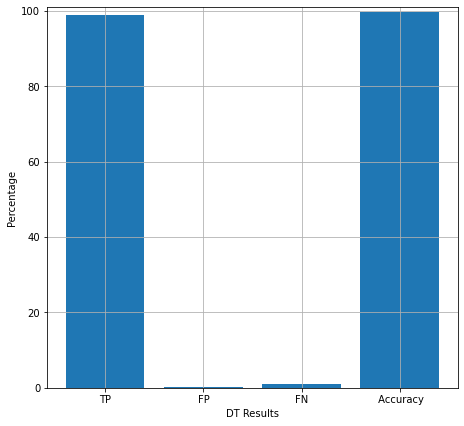

In [1076]:
names = ['TP','FP','FN',' Accuracy']
values = [99.05,0.24,0.95,99.62]
f = plt.figure(figsize=(25,7),num=10)
plt.subplot(131)
plt.ylim(0,101)
plt.xlabel('DT Results')
plt.bar(names,values)
plt.ylabel('Percentage')
plt.grid()
plt.show()

RANDOM FOREST

In [1077]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=30)
import datetime as dt

In [1078]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  7.540811061859131


In [1079]:
start = dt.datetime.now()
Y_test_pred3 = model3.predict(X_test)
print("Testing time: ",dt.datetime.now()-start) 

Testing time:  0:00:00.417474


In [1080]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.9999728091747887
Test score is: 0.9996871683831513


In [1081]:
#Measure accuracy
from sklearn.metrics import confusion_matrix
print('Predicting on the test data:')

cm=confusion_matrix(Y_test,Y_test_pred3)
print(cm)

Predicting on the test data:
[[129104      2      0      0      0]
 [     1  32161      2      3      0]
 [     0     21   1327      0      0]
 [     1     14      0    371      1]
 [     0      6      0      0     13]]


In [1082]:
import disarray
class_name = ("dos","r2l","probe","u2r","normal")
df = pd.DataFrame(cm,index=class_name, columns=class_name)
print(df)

           dos    r2l  probe  u2r  normal
dos     129104      2      0    0       0
r2l          1  32161      2    3       0
probe        0     21   1327    0       0
u2r          1     14      0  371       1
normal       0      6      0    0      13


detection rate/TP/recall/sensitivity

In [1083]:
df.da.micro_true_positive_rate

0.9996871683831513

In [1084]:
df.da.micro_recall

0.9996871683831513

In [1085]:
df.da.micro_sensitivity

0.9996871683831513

false alarm/FP

In [1086]:
df.da.micro_false_positive_rate

7.820790421218571e-05

Failed detections/FN

In [1087]:
df.da.micro_false_negative_rate

0.00031283161684874283

Classification Accuracy

In [1088]:
df.da.micro_accuracy

0.9998748673532605

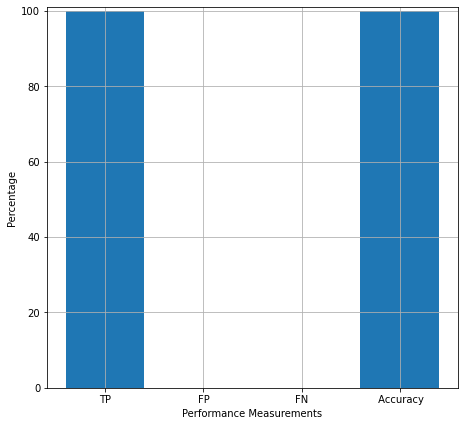

In [1105]:
names = ['TP','FP','FN',' Accuracy']
values = [99.97,0.000078,0.03,99.99]
f = plt.figure(figsize=(25,7),num=10)
plt.subplot(131)
plt.ylim(0,101)
plt.xlabel('Performance Metric')
plt.bar(names,values)
plt.ylabel('Percentage')
plt.grid()
plt.show()


SUPPORT VECTOR MACHINE

In [1090]:
from sklearn.svm import SVC
model4 = SVC(gamma = 'scale')

In [1091]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  102.4963128566742


In [1092]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  23.478599786758423


In [1093]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

Train score is: 0.9987552644458811
Test score is: 0.9987916112055059


In [1094]:
#Measure accuracy
from sklearn.metrics import confusion_matrix
print('Predicting on the test data:')

cm=confusion_matrix(Y_test,Y_test_pred4)
print(cm)

Predicting on the test data:
[[129097      8      0      1      0]
 [    28  32086     11     40      2]
 [     1     50   1297      0      0]
 [     1     46      1    338      1]
 [     0      3      0      4     12]]


In [1095]:
import disarray
class_name = ("dos","r2l","probe","ur2","normal")
df = pd.DataFrame(cm,index=class_name, columns=class_name)
print(df)

           dos    r2l  probe  ur2  normal
dos     129097      8      0    1       0
r2l         28  32086     11   40       2
probe        1     50   1297    0       0
ur2          1     46      1  338       1
normal       0      3      0    4      12


detection rate/TP/recall/sensitivity

In [1096]:
df.da.micro_true_positive_rate

0.9987916112055059

In [1097]:
df.da.micro_recall

0.9987916112055059

In [1098]:
df.da.micro_sensitivity

0.9987916112055059

false alarm/FP

In [1099]:
df.da.micro_false_positive_rate

0.0003020971986235409

Failed detections/FN

In [1100]:
df.da.micro_false_negative_rate

0.0012083887944941635

Classification Accuracy

In [1101]:
df.da.micro_accuracy

0.9995166444822023

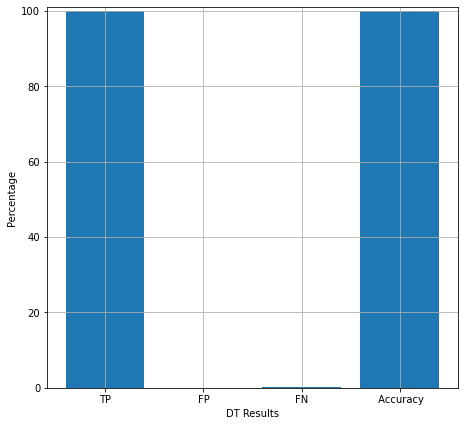

In [1102]:
names = ['TP','FP','FN',' Accuracy']
values = [99.88,0.03,0.12,99.96]
f = plt.figure(figsize=(25,7),num=10)
plt.subplot(131)
plt.ylim(0,101)
plt.xlabel('DT Results')
plt.bar(names,values)
plt.ylabel('Percentage')
plt.grid()
plt.show()

TP Result

<BarContainer object of 4 artists>

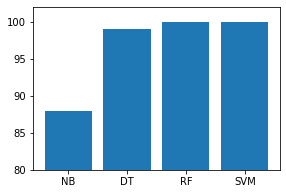

In [1103]:
names = ['NB','DT','RF','SVM']
values = [87.903,99.052,99.969,99.879]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)